In [1]:
import sys  
sys.path.insert(1, './../../../ESN-IP/IP/.')

import random

random.seed(10)

from DATA import MG17

data = MG17(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()


In [2]:
from IPReservoir import IPReservoir
from ESN import Reservoir, EchoStateNetwork
from IntrinsicPlasticity import IPMask, IPDistribution

N_UNITS_LIST = [25, 50, 75]
W_range=(-0.5, 0.5)
initial_rho = 0.5
desired_rhos = [0.75, 0.9, 0.95]
bias_range = [-0.1, 0.1]


In [3]:
for N_UNITS in N_UNITS_LIST:
    vanilla_reservoir = Reservoir(N = N_UNITS, desired_rho = initial_rho, W_range=W_range, bias_range=bias_range)
    rescaled_reservoir_1 = Reservoir(N = N_UNITS, desired_rho = desired_rhos[0], W_range=W_range, bias_range=bias_range)
    rescaled_reservoir_2 = Reservoir(N = N_UNITS, desired_rho = desired_rhos[1], W_range=W_range, bias_range=bias_range)
    rescaled_reservoir_3 = Reservoir(N = N_UNITS, desired_rho = desired_rhos[2], W_range=W_range, bias_range=bias_range)

    gaussian_reservoir_1 = IPReservoir(N = N_UNITS, desired_rho=0.75, bias = True, W_range=W_range, bias_range=bias_range, mask=IPMask.gaussian(N_UNITS,0.5, apply_activation=True))
    gaussian_reservoir_2 = IPReservoir(N = N_UNITS, desired_rho=0.75, bias = True, W_range=W_range, bias_range=bias_range, mask=IPMask.gaussian(N_UNITS,0.25, apply_activation=True))

    bimodal_reservoir = IPReservoir(N = N_UNITS, desired_rho=0.75, bias = True, W_range=W_range, bias_range=bias_range, mask=IPMask.bimodal(N_UNITS, 0.69, 0.92, apply_activation=True))
     
    trimodal_reservoir_1 = IPReservoir(N = N_UNITS, desired_rho=0.75, bias = True, W_range=W_range, bias_range=bias_range, mask=IPMask.trimodal(N_UNITS, 7/10, 0.25, 0.15, 0.92, apply_activation=True))
    trimodal_reservoir_2 = IPReservoir(N = N_UNITS, desired_rho=0.75, bias = True, W_range=W_range, bias_range=bias_range, mask=IPMask.trimodal(N_UNITS, 7/10, 0.2, 0.075, 0.72, apply_activation=False))

In [4]:
REPETITIONS = 5

In [7]:
import numpy as np

In [10]:
gaussian_reservoir_1.a.norm

<bound method Tensor.norm of tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.])>

In [9]:
np.linalg.norm(gaussian_reservoir_1.a)

8.6602545

## Gaussian 1 $\sigma = 0.5$

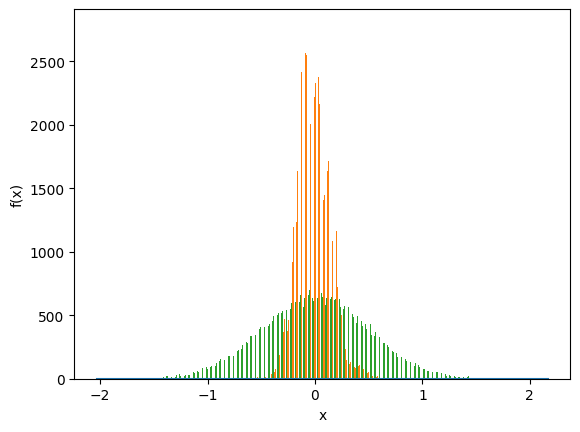

In [12]:
gaussian_reservoir_1.pre_train(X_TS, 0, 0)
gaussian_reservoir_1.predict(X_TS, save_gradients=False, save_states=True)
gaussian_reservoir_1.plot_neural_activity()

## Gaussian 2 $\sigma = 0.25$

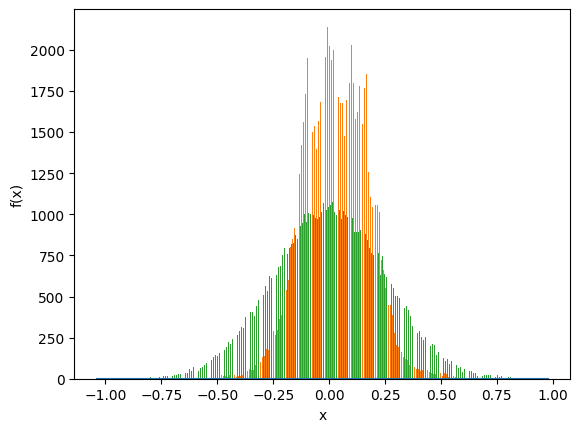

In [13]:
gaussian_reservoir_2.pre_train(X_TS, 0, 0)
gaussian_reservoir_2.predict(X_TS, save_gradients=False, save_states=True)
gaussian_reservoir_2.plot_neural_activity()

## Bimodal Reservoir $\mu = \pm 0.92$

#### Before $f(x)$

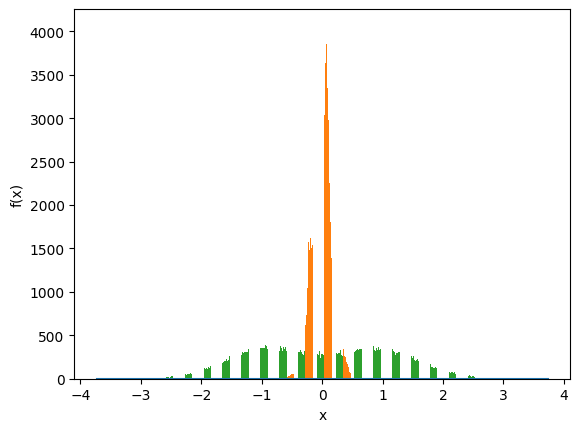

In [8]:
bimodal_reservoir.pre_train(X_TS, 0, 0)
bimodal_reservoir.predict(X_TS, save_gradients=False, save_states=True)
bimodal_reservoir.plot_neural_activity(apply_activation_Y=False)

#### After $f(x)$

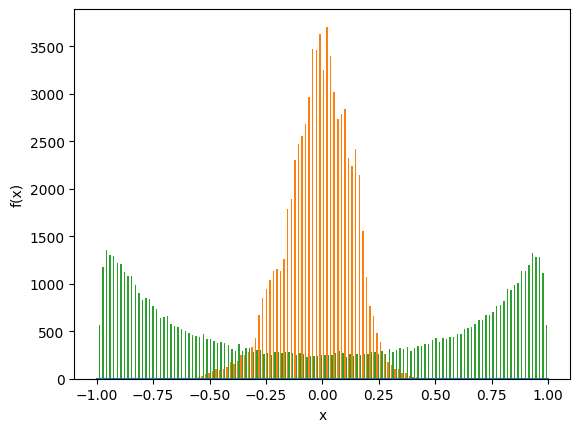

In [47]:
bimodal_reservoir.pre_train(X_TS, 0, 0)
bimodal_reservoir.predict(X_TS, save_gradients=False, save_states=True)
bimodal_reservoir.plot_neural_activity(apply_activation_Y=True)

## Trimodal 1 almost equally linear and non-linear (with $f(x)$)

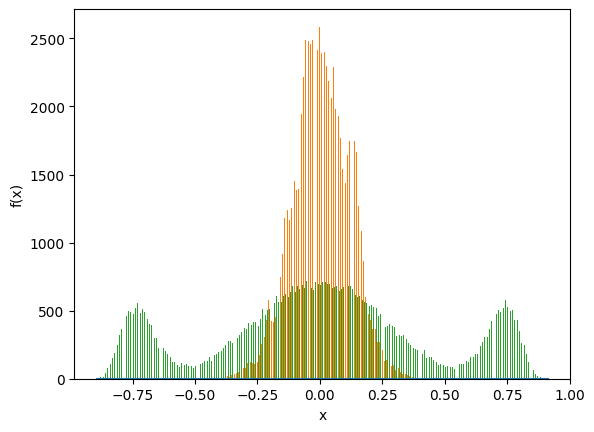

In [38]:
trimodal_reservoir_1.pre_train(X_TS, 0, 0)
trimodal_reservoir_1.predict(X_TS, save_gradients=False, save_states=True)
trimodal_reservoir_1.plot_neural_activity(apply_activation_Y=True)

## Trimodal 2, more linear (without $f(x)$)

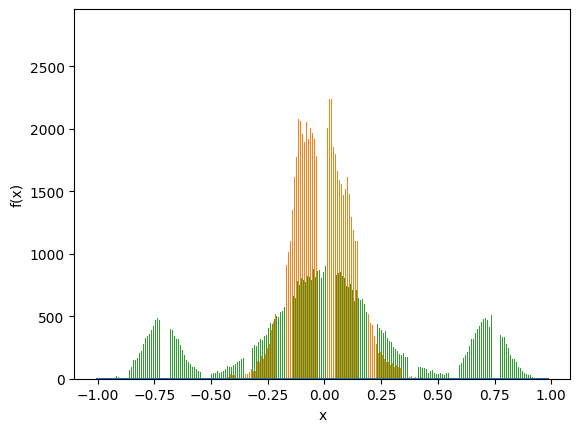

In [12]:
trimodal_reservoir_2.pre_train(X_TS, 0, 0)
trimodal_reservoir_2.predict(X_TS, save_gradients=False, save_states=True)
trimodal_reservoir_2.plot_neural_activity(apply_activation_X=True, apply_activation_Y=False)